In [1]:
%load_ext autoreload
%autoreload 2

import sys,os,time,copy
from calendar import isleap
from magpy import mag0
from magpy import mag_species
from multiprocessing import Pool
import numpy as np
import pandas as pd

from magpy.mag_util import generate_standard_runs,postprocess,get_mask,eez_mask,csv_from_pp,get_area

ModuleNotFoundError: No module named 'netCDF4'

In [ ]:

param_dict = {
    "output_path": "./output",
    # I don't know what these _feq params are,
    # but they're definition is important to avoid errors.
    # These are set as 8 in mag_std_runs_paper.py
    "Growth2_freq": 8,
    "d_Be_freq": 8,
    "d_Bm_freq": 8,
    "d_Ns_freq": 8,
    "harv_freq": 8,
    "GRate_freq": 8,
    "B_N_freq": 8,
    "n_harv_freq": 8,
    "min_lim_freq": 8,
    "gQ_freq": 8,
    "gT_freq": 8,
    "gE_freq": 8,
    "gH_freq": 8,
    # -1 Turns off harvesting
    "mp_harvest_schedule": -1,
    # 0 means to not limit the nitrogen just to possible upwelling 
    "mp_N_flux_limit": 0,
    # The deathrate (day^-1), this has a significant effect on the results
    "mp_spp_death": 0.01,
    # Line separation, with high enough yields and small enough spacings you
    # can get crowding effects
    "mp_spp_line_sep": 5.0,
}
input_dict = mag_species.Saccharina
input_dict.update(param_dict)

params = mag0.build_run_params(
    input_dict
)
forcing = pd.DataFrame(
    {
        # Sea surface temperature (deg C)
        "sst": [10, 10],
        # Amount of light at the water surface. Not sure about the unit here,
        # it's probably something like mols/day or umol/s
        "par": [20, 20],
        # Chlorophyll, I think this contributed to turbidity?
        "chl": [0, 0],
        # Significant wave height, large wav
        "swh": [0, 0],
        # Mean wave period, matters for nitrogen absorption (s)
        "mwp": [4, 4],
        # Pretty sure this is the ambient current, affects nitrogen uptake.
        # I think this is in m/s
        "cmag": [0.3, 0.3],
        # Environmental nitrogen, not sure about the unit or what exactly is
        # being measured here.
        "no3": [0.5, 0.5],
        "nflux": [0, 0],
        "seed": [1, 1],
        # Latitude, matters for daylight duration
        "ylat": [43, 43],
        # This doesn't do anything in this single point case
        "xlon360": [250, 250],
        "var": [0.1] * 12
    },
    index=pd.DatetimeIndex(["1/1/2003 00:00:00", "1/1/2004 00:00:00"]),
)
print(forcing.shape)

In [ ]:
for multiplier in [0.5, 1.0, 1.5]:
    new_forcing = forcing.copy()
    new_forcing["no3"] *= multiplier

    growth_model = mag0.MAG0(params, new_forcing)
    results = growth_model.compute()

    plt.plot(results.index, results.B / 1e3)
results

Creating & opening output files...


c:\Users\A.Kinley\Desktop\code\G-MACMODS\magpy\mag0.py:961: SerializationWarning: saving variable n_harv with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds.to_netcdf(
c:\Users\A.Kinley\Desktop\code\G-MACMODS\magpy\mag0.py:961: SerializationWarning: saving variable min_lim with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds.to_netcdf(


,B,Q,Gave,Dave,d_B,d_Q,Growth2,d_Be,d_Bm,d_Ns,...,par,chl,swh,mwp,cmag,no3,nflux,seed,ylat,xlon360
date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,49.659260,11.035209,NaN,NaN,-0.340739,0.229208,0.269261,0.313000,0.610000,14.667459,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-01-02,49.411644,11.239415,NaN,NaN,-0.247617,0.204206,0.358226,0.424690,0.605843,14.490201,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-01-03,49.242977,11.421332,NaN,NaN,-0.168668,0.181917,0.434154,0.523474,0.602822,14.349422,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-01-04,49.141891,11.583359,NaN,NaN,-0.101088,0.162027,0.499677,0.611269,0.600764,14.239601,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-01-05,49.099155,11.727622,NaN,NaN,-0.042736,0.144263,0.556795,0.689637,0.599531,14.156296,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-27,764.354553,14.700858,NaN,NaN,1.859180,0.009908,11.161623,34.395782,9.302444,203.559433,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-12-28,766.221680,14.710392,NaN,NaN,1.867148,0.009534,11.192273,34.555382,9.325126,204.004333,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0
2003-12-29,768.097656,14.719549,NaN,NaN,1.875952,0.009157,11.223856,34.712841,9.347904,204.453049,...,20.0,0.0,0.0,4.0,0.3,0.5,0.0,1.0,43.0,250.0


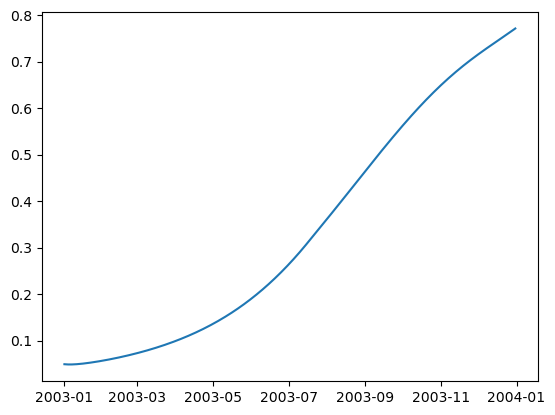

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.plot(results.index, results.B / 1e3)
# sns.lineplot(results.reset_index(), x="date", y="B")
# sns.lineplot(results.reset_index(), x="date", y="d_Bm")